In [ ]:
# Netflix Recommendation Engine - Capstone Project

# Dataset: ID (user/movie), Rating, Genre, Movie Name
# Objective 1: Most popular and liked genres
# Objective 2: Create Model for best suited movies per user per genre
# Objective 3: Best and worst rated genres
# Using: Linear Regression, Decision Tree, Random Forest


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Step 1: Create Simple Dataset
print("🎬 Creating Netflix Dataset...")

🎬 Creating Netflix Dataset...


In [ ]:
# Sample Movies Data
movies = pd.DataFrame({
    'movie_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'movie_name': ['Action Movie 1', 'Comedy Movie 1', 'Drama Movie 1',
                   'Action Movie 2', 'Comedy Movie 2', 'Drama Movie 2',
                   'Action Movie 3', 'Comedy Movie 3', 'Drama Movie 3', 'Horror Movie 1'],
    'genre': ['Action', 'Comedy', 'Drama', 'Action', 'Comedy',
              'Drama', 'Action', 'Comedy', 'Drama', 'Horror']
})

In [ ]:

# Sample Ratings Data
np.random.seed(42)
ratings_data = []
for user in range(1, 21):  # 20 users
    for movie in range(1, 11):  # 10 movies
        if np.random.random() > 0.3:  # 70% chance user rated the movie
            rating = np.random.randint(1, 6)  # Rating 1-5
            ratings_data.append([user, movie, rating])

ratings = pd.DataFrame(ratings_data, columns=['user_id', 'movie_id', 'rating'])

print(f"✅ Created {len(movies)} movies and {len(ratings)} ratings")
print("\nSample Movies:")
print(movies)
print("\nSample Ratings:")
print(ratings.head())

print("\n" + "="*60)
print("OBJECTIVE 1: MOST POPULAR AND LIKED GENRES")
print("="*60)

✅ Created 10 movies and 137 ratings

Sample Movies:
   movie_id      movie_name   genre
0         1  Action Movie 1  Action
1         2  Comedy Movie 1  Comedy
2         3   Drama Movie 1   Drama
3         4  Action Movie 2  Action
4         5  Comedy Movie 2  Comedy
5         6   Drama Movie 2   Drama
6         7  Action Movie 3  Action
7         8  Comedy Movie 3  Comedy
8         9   Drama Movie 3   Drama
9        10  Horror Movie 1  Horror

Sample Ratings:
   user_id  movie_id  rating
0        1         1       5
1        1         3       5
2        1         7       4
3        1         9       5
4        1        10       4

OBJECTIVE 1: MOST POPULAR AND LIKED GENRES


In [ ]:

# Merge data
movie_ratings = ratings.merge(movies, on='movie_id')

In [ ]:
# Find popular genres
genre_popularity = movie_ratings['genre'].value_counts()
print("📊 Most Popular Genres (by number of ratings):")
print(genre_popularity)

📊 Most Popular Genres (by number of ratings):
genre
Comedy    42
Drama     41
Action    37
Horror    17
Name: count, dtype: int64


In [ ]:
# Find liked genres
genre_avg_rating = movie_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)
print("\n⭐ Most Liked Genres (by average rating):")
print(genre_avg_rating.round(2))


⭐ Most Liked Genres (by average rating):
genre
Action    3.46
Drama     3.00
Horror    2.82
Comedy    2.69
Name: rating, dtype: float64


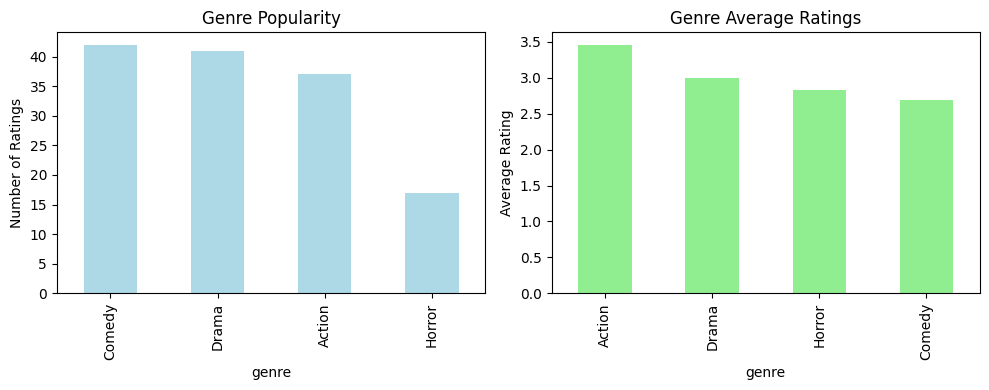


OBJECTIVE 2: CREATE MODEL FOR MOVIE RECOMMENDATIONS


In [ ]:

# Simple visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
genre_popularity.plot(kind='bar', color='lightblue')
plt.title('Genre Popularity')
plt.ylabel('Number of Ratings')

plt.subplot(1, 2, 2)
genre_avg_rating.plot(kind='bar', color='lightgreen')
plt.title('Genre Average Ratings')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("OBJECTIVE 2: CREATE MODEL FOR MOVIE RECOMMENDATIONS")
print("="*60)

In [ ]:
# Prepare data for machine learning
print("🤖 Creating ML Models...")

🤖 Creating ML Models...


In [ ]:
# Create features for ML model
# We'll predict rating based on user_id, movie_id, and genre
ml_data = movie_ratings.copy()

In [ ]:

# Convert genre to numbers
genre_mapping = {genre: i for i, genre in enumerate(ml_data['genre'].unique())}
ml_data['genre_encoded'] = ml_data['genre'].map(genre_mapping)

In [ ]:

# Features: user_id, movie_id, genre_encoded
X = ml_data[['user_id', 'movie_id', 'genre_encoded']]
y = ml_data['rating']

In [ ]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Train different models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42)
}

In [ ]:
print("📈 Training Models...")
model_results = {}

📈 Training Models...


In [ ]:
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate error
    mse = mean_squared_error(y_test, y_pred)
    model_results[name] = {'model': model, 'mse': mse}

    print(f"{name}: Error = {mse:.3f}")

Linear Regression: Error = 2.035
Decision Tree: Error = 4.214
Random Forest: Error = 2.768


In [ ]:

# Choose best model (lowest error)
best_model_name = min(model_results.keys(), key=lambda x: model_results[x]['mse'])
best_model = model_results[best_model_name]['model']
print(f"\n🏆 Best Model: {best_model_name}")


🏆 Best Model: Linear Regression


In [ ]:
def recommend_movies_for_user(user_id, genre=None):
    """Recommends movies for a given user, optionally filtered by genre."""
    print(f"\n🎯 Recommendations for User {user_id}:")

    # Get movies the user hasn't rated
    user_rated_movies = movie_ratings[movie_ratings['user_id'] == user_id]['movie_id']
    unrated_movies = movies[~movies['movie_id'].isin(user_rated_movies)].copy()

    if genre:
        unrated_movies = unrated_movies[unrated_movies['genre'] == genre]
        print(f"📽 {genre} movies for User {user_id}:")
    else:
        print(f"📽 All unrated movies for User {user_id}:")

    if unrated_movies.empty:
        print("No new movies to recommend!")
        return

    # Predict ratings for unrated movies
    recommendations = []
    for _, movie in unrated_movies.iterrows():
        # Ensure genre is in mapping, handle potential new genres gracefully
        genre_encoded = genre_mapping.get(movie['genre'], -1) # Use -1 or another indicator for unknown genres
        if genre_encoded != -1: # Only predict if genre is known
            predicted_rating = best_model.predict([[user_id, movie['movie_id'], genre_encoded]])[0]
            recommendations.append({
                'movie_name': movie['movie_name'],
                'genre': movie['genre'],
                'predicted_rating': round(predicted_rating, 2)
            })

    # Sort by predicted rating
    recommendations.sort(key=lambda x: x['predicted_rating'], reverse=True)

    # Show top 3 recommendations
    for i, rec in enumerate(recommendations[:3], 1):
        print(f"{i}. {rec['movie_name']} ({rec['genre']}) - Predicted Rating: {rec['predicted_rating']}")

# Test recommendations
recommend_movies_for_user(1)  # All genres
recommend_movies_for_user(1, 'Action')  # Only Action movies
recommend_movies_for_user(5, 'Comedy')  # Only Comedy movies

print("\n" + "="*60)
print("OBJECTIVE 3: BEST AND WORST RATED GENRES")
print("="*60)


🎯 Recommendations for User 1:
📽 All unrated movies for User 1:
1. Action Movie 2 (Action) - Predicted Rating: 3.45
2. Drama Movie 2 (Drama) - Predicted Rating: 3.29
3. Comedy Movie 3 (Comedy) - Predicted Rating: 2.94

🎯 Recommendations for User 1:
📽 Action movies for User 1:
1. Action Movie 2 (Action) - Predicted Rating: 3.45

🎯 Recommendations for User 5:
📽 Comedy movies for User 5:
1. Comedy Movie 3 (Comedy) - Predicted Rating: 2.8
2. Comedy Movie 2 (Comedy) - Predicted Rating: 2.78

OBJECTIVE 3: BEST AND WORST RATED GENRES


In [ ]:
# Calculate genre statistics
genre_stats = movie_ratings.groupby('genre')['rating'].agg(['mean', 'count']).round(2)
genre_stats.columns = ['Average_Rating', 'Total_Ratings']
genre_stats = genre_stats.sort_values('Average_Rating', ascending=False)

print("Genre Rating Analysis:")
print(genre_stats)

best_genre = genre_stats.index[0]
worst_genre = genre_stats.index[-1]

print(f"\n🏆 BEST RATED GENRE: {best_genre}")
print(f"   Average Rating: {genre_stats.loc[best_genre, 'Average_Rating']}/5.0")
print(f"   Total Ratings: {genre_stats.loc[best_genre, 'Total_Ratings']}")

print(f"\n📉 WORST RATED GENRE: {worst_genre}")
print(f"   Average Rating: {genre_stats.loc[worst_genre, 'Average_Rating']}/5.0")
print(f"   Total Ratings: {genre_stats.loc[worst_genre, 'Total_Ratings']}")

Genre Rating Analysis:
        Average_Rating  Total_Ratings
genre                                
Action            3.46             37
Drama             3.00             41
Horror            2.82             17
Comedy            2.69             42

🏆 BEST RATED GENRE: Action
   Average Rating: 3.46/5.0
   Total Ratings: 37

📉 WORST RATED GENRE: Comedy
   Average Rating: 2.69/5.0
   Total Ratings: 42


(0.0, 5.0)

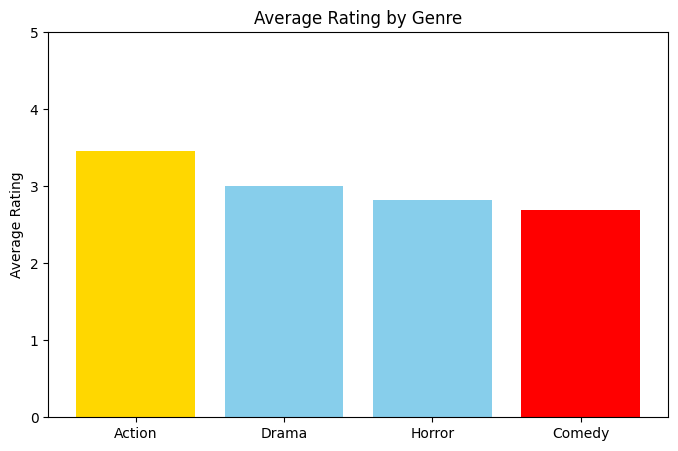

In [ ]:
# Simple bar chart
plt.figure(figsize=(8, 5))
colors = ['gold' if x == best_genre else 'red' if x == worst_genre else 'skyblue'
          for x in genre_stats.index]
plt.bar(genre_stats.index, genre_stats['Average_Rating'], color=colors)
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.ylim(0, 5)

In [ ]:


print("\n📊 Final Results:")
print(f"- Most Popular Genre: {genre_popularity.index[0]}")
print(f"- Best Rated Genre: {best_genre} ({genre_stats.loc[best_genre, 'Average_Rating']}/5.0)")
print(f"- Best ML Model: {best_model_name}")
print(f"- Total Movies: {len(movies)}")
print(f"- Total Users: {ratings['user_id'].nunique()}")
print(f"- Total Ratings: {len(ratings)}")



📊 Final Results:
- Most Popular Genre: Comedy
- Best Rated Genre: Action (3.46/5.0)
- Best ML Model: Linear Regression
- Total Movies: 10
- Total Users: 20
- Total Ratings: 137
